In [1]:
import TMQGP as tm
from numpy import *
import QuarkTM

In [2]:
qrange = linspace(0, 5, 151)
erange = linspace(-5, 5, 401)

In [3]:
q = QuarkTM.Particle(0.5, qrange, erange)

In [4]:
ch = QuarkTM.Channel(q, q, 0.2, G=14, L=.3)

In [5]:
ch.populate_T_old()

  0%|          | 0/401 [00:00<?, ?it/s]

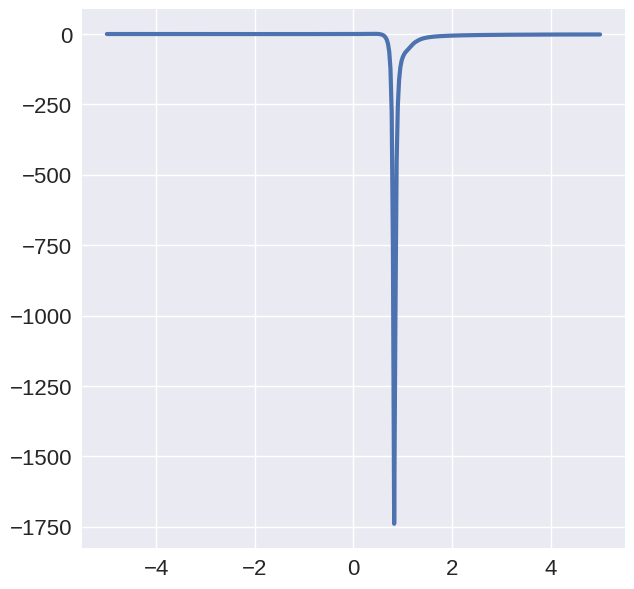

In [6]:
plt.plot(erange, imag(ch.TM[:, 0]))

In [7]:
sigma = array([tm.sigma_ff(e, 0, 0.2, ch.iImT, q.R) for e in erange])

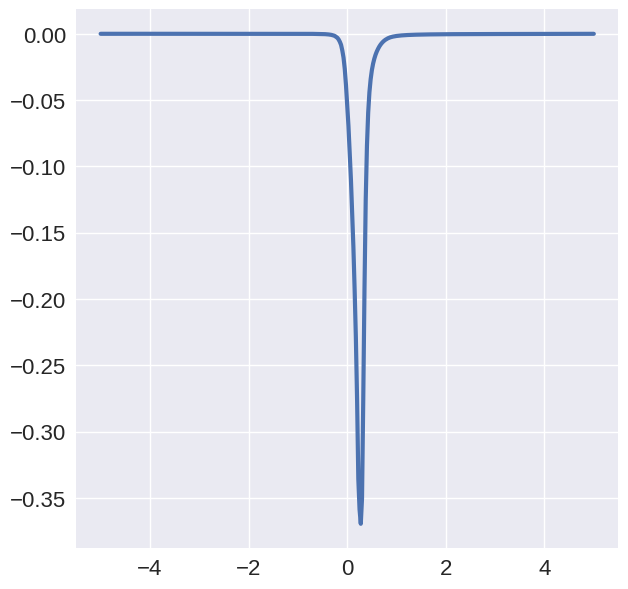

In [8]:
plt.plot(erange, sigma)

In [9]:
ch.TM[imag(ch.TM) > 0] = 0

In [10]:
ch.iImT = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(ch.TM)))

In [11]:
eps1 = tm.Interpolator(qrange, q.om0(qrange), 'linear')
eps2 = tm.Interpolator(qrange, q.om0(qrange), 'linear')

In [12]:
sigma_on = array([tm.sigma_ff_onshell(e, 0, 0.2, ch.iImT, q.R, eps1, eps2) for e in erange])

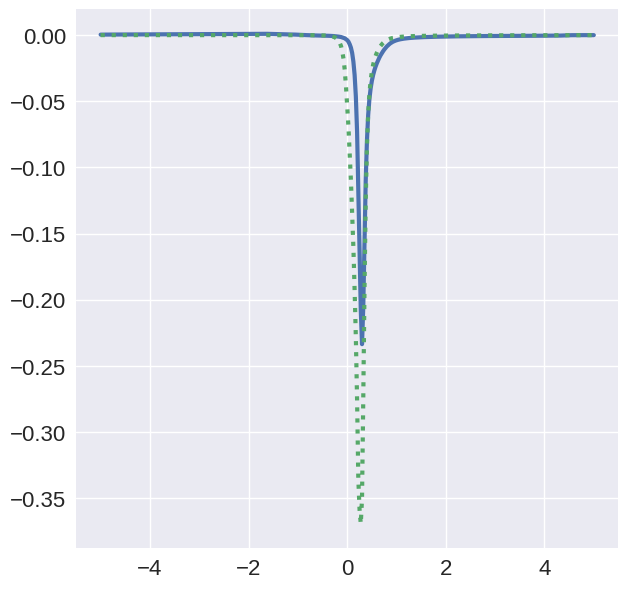

In [36]:
plt.plot(erange, sigma_on)
plt.plot(erange, sigma, ls=':')
# plt.ylim(-.0005, .0005)

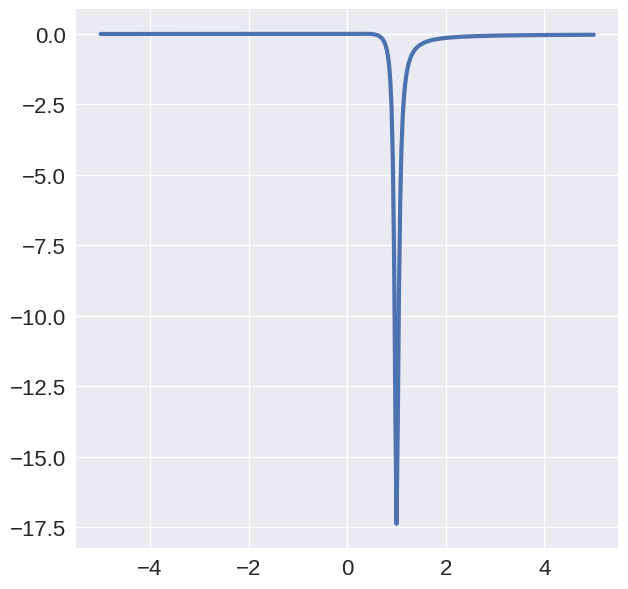

In [35]:
plt.plot(erange, ch.ImG2[:, 0])

# plt.semilogy()

In [14]:
tm.x_integral_cm_onshell(1.5, 1.5, 0, 0.2, ch.iImT, q.R, eps1, eps2)

-0.004047922378469678

In [15]:
tm.x_integral_cm2(1.5, 1.5, 0, 0.2, ch.iImT, q.R)

-0.003995348599585556

In [22]:
om = -2.

In [23]:
on = array([tm.k_integral_onshell(e, om, 0., ch.iImT, q.R, eps1, eps2) for e in erange])

In [24]:
off = array([tm.k_integral_cm2(e, om, 0., ch.iImT, q.R) for e in erange])

In [25]:
T = 0.2

In [26]:
therm = array([tm.n_f(e, T) + tm.n_b(e + om, T) for e in erange])

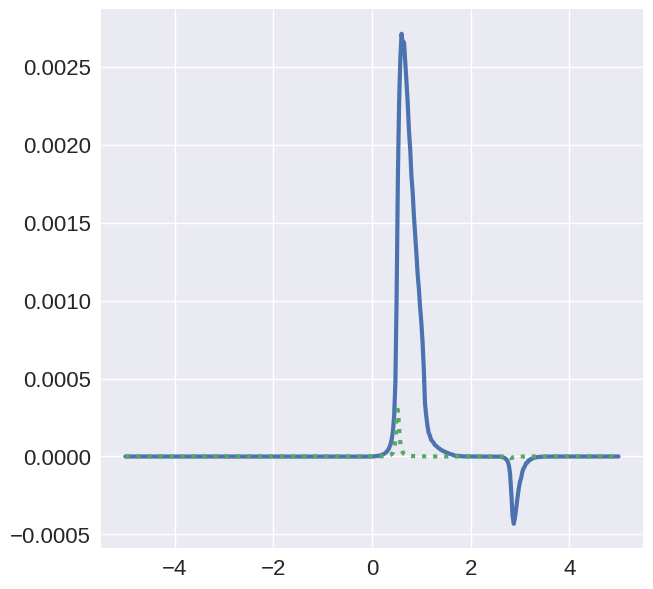

In [27]:
plt.plot(erange, on * therm)
plt.plot(erange, off * therm, ls=':')